# DATA VISUALIZATION EXAMPLES
Note: some of these libraries may not be understood by 
the linter (e.g. figure, plot, xlabel, etc.). Just ignore those l
inter errors for now.

## Sources
Some of these examples were taken from J.R. Johansson's [Matplotlib tutorial](http://nbviewer.jupyter.org/github/jrjohansson/scientific-python-lectures/blob/master/Lecture-4-Matplotlib.ipynb).

In [54]:
# Import these lines to get the code below to run successfully:

from pylab import *
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

## Example 1: Making an XY line graph

In [58]:
x = np.linspace(-5, 5, 21)
y = x**2
print('x coordinates:\n', x)
print('\ny coordinates:\n', y)

x coordinates:
 [-5.  -4.5 -4.  -3.5 -3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5
  2.   2.5  3.   3.5  4.   4.5  5. ]

y coordinates:
 [25.   20.25 16.   12.25  9.    6.25  4.    2.25  1.    0.25  0.    0.25
  1.    2.25  4.    6.25  9.   12.25 16.   20.25 25.  ]


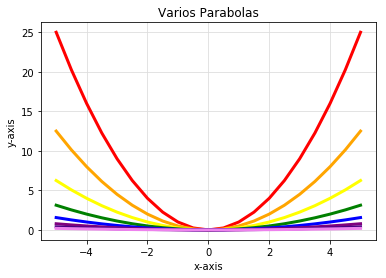

In [85]:
# plot a bunch of parabolas together
fig, ax = plt.subplots(1, 1)

# draw lots of lines on the same plot:
w = 3
plot(x, x**2, 'red', linewidth=w)
plot(x, x**2 / 2, 'orange', linewidth=w)
plot(x, x**2 / 4, 'yellow', linewidth=w)
plot(x, x**2 / 8, 'green', linewidth=w)
plot(x, x**2 / 16, 'blue', linewidth=w)
plot(x, x**2 / 32, 'purple', linewidth=w)
plot(x, x**2 / 64, 'indigo', linewidth=w)
plot(x, x**2 / 128, 'violet', linewidth=w)

# add grid lines and labels:
ax.grid(zorder=0, color='#DDDDDD')
xlabel('x-axis')
ylabel('y-axis')
title('Varios Parabolas')
show()

## Example 2: Some sample plots
Below are 4 plots, generated on a single plot grid.

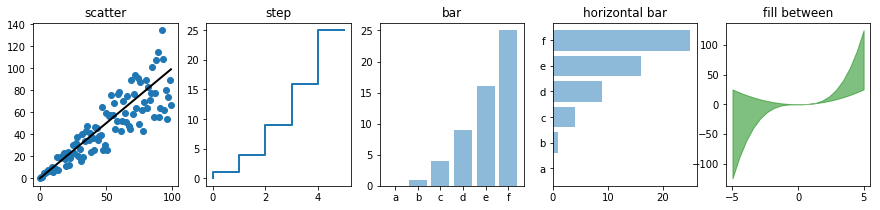

In [11]:
# initialize subplot grid
fig, axes = plt.subplots(1, 5, figsize=(15,3)) # num_row, num_cols, optional_args

# 1. scatterplot
import random
x_array = [n for n in range(0, 100)]
noise = 40
y_array = [random.uniform(n - n/2, n + n/2) for n in range(0, 100)]
axes[0].scatter(x_array, y_array)
axes[0].plot(x_array, x_array, color="black", linewidth=2)
axes[0].set_title("scatter")

# 2. step plot
n = np.array([0,1,2,3,4,5])
axes[1].step(n, n**2, lw=2)
axes[1].set_title("step")

# 3. bar chart
axes[2].bar(['a', 'b', 'c', 'd', 'e', 'f'], n**2, align="center", width=0.8, alpha=0.5)
axes[2].set_title("bar")

# 4. horizontal bar chart
axes[3].barh(['a', 'b', 'c', 'd', 'e', 'f'], n**2, align="center", alpha=0.5)
axes[3].set_title("horizontal bar")

# 5. fill between plot
x = np.linspace(-5, 5, 20)
axes[4].fill_between(x, x**2, x**3, color="green", alpha=0.5)
axes[4].set_title("fill between")

plt.show()

## Example 3: A series of scatter plots (using fake data)
Proof of concept: increasingly more noisy correlations + ordinary 
least squares plot. Uses numpy to calculate the OLS line of a set 
of (x, y) coordinates.

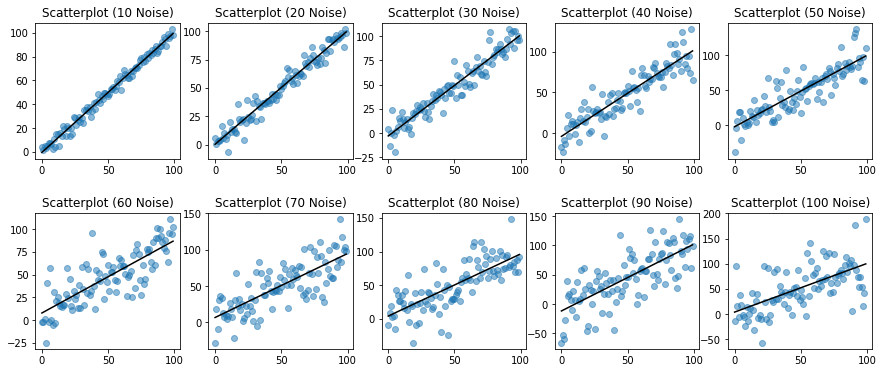

In [43]:
import random
import numpy as np

def rando(n, max):
    d = random.uniform(0, max)
    return random.uniform(n - d, n + d)

def get_ols_y_axis(x_array, y_array):
    x = np.array(x_array)
    y = np.array(y_array)
    A = np.vstack([x, np.ones(len(x))]).T
    m, c = np.linalg.lstsq(A, y, rcond=None)[0]
    y = m*x + c
    return list(y)

fig, axes = plt.subplots(2, 5, figsize=(15,6), gridspec_kw={'hspace': 0.4}) # num_row, num_cols, optional_args
x_array = [n for n in range(0, 100)]
counter = 1

# generate 10 scatter plots with increasingly more noise (fake correlation data)
for i in range(0, 2):
    for j in range(0, 5):
        noise = counter * 10
        y_array = [rando(n, noise) for n in range(0, 100)]
        axes[i][j].scatter(x_array, y_array, alpha=0.5)

        # Plot ordinary least squares of plot:
        y_ols = get_ols_y_axis(x_array, y_array)
        axes[i][j].plot(x_array, y_ols, color="black", linewidth=1.5)
        axes[i][j].set_title("Scatterplot ({0} Noise)".format(noise))
        counter += 1

plt.show()